In [ ]:
#Converting XES to CSV file
!pip install PM4PY
import pm4py 
import os
from pm4py.objects.log.importer.xes import factory as xes_import_factory
parameters={"timestamp_sort": True}
log = xes_import_factory.apply('C:\\Hospital_log.xes',variant="nonstandard",parameters=parameters)
import pandas as pd
from pm4py.objects.log.exporter.csv import factory as csv_exporter
csv_exporter.export(log,"total.csv")
df=pd.read_csv("total.csv")
df

In [ ]:
#LTL function(Gold standard labels)
c1=[0 for t in range(0,1143)]
c2=[0 for t in range(0,1143)]
c31=[0 for t in range(0,1143)]
c32=[0 for t in range(0,1143)]
c3=[0 for t in range(0,1143)]
c4=[0 for t in range(0,1143)]
for i in range(0,1143):
    csv_exporter.export(log[i],"total"+str(i)+".csv")
    import pandas as pd
    d=pd.read_csv("total"+str(i)+".csv")
    concept_name=d['concept:name'].unique()
    for x in range(0,len(concept_name)):
        if 'ca-125 mbv meia' == concept_name[x] or 'ca-19.9 tumormarker'==concept_name[x]:
            c1[i]+=1
        if 'cea - tumormarker mbv meia'== concept_name[x]:
            for k in range(x+1,len(concept_name)):
                  if 'squamous cell carcinoma mbv eia'==concept_name[k]:
                        c2[i]+=1
                
        if 'squamous cell carcinoma mbv eia'==concept_name[x]:
            c31[i]+=1
        if 'histologisch onderzoek - biopten nno'== concept_name[x]:
            for k in range(x+1,len(concept_name)):
                if 'squamous cell carcinoma mbv eia' ==concept_name[k]:
                    c32[i]+=1   
        c3[i]=c31[i]-c32[i]          
        if 'histologisch onderzoek - grote resectiep' ==concept_name[x]:
            c4[i]+=1
    
    d['Trace_id']=i
    #For 1st function
    if c1[i]==0:
        d['phi1']='No'
    else:
        d['phi1']='Yes'
    #For 2nd function    
    if c2[i]>0:
        d['phi2']='Yes'
    else:
        d['phi2']='No'
    #For 3rd function
    if c3[i]>0:
        d['phi3']='Yes'
    else:
        d['phi3']='No'
    #For 4th function    
    if c4[i]==0:
        d['phi4']='No'
    else:
        d['phi4']='Yes'
    d.to_csv("total"+str(i)+".csv",index=True)        


In [ ]:
#Combining Multiple csv files to single csv file
from os import chdir
from glob import glob
import pandas as pdlib

def produceOneCSV(list_of_files, file_out):
   # Consolidate all CSV files into one object
   result_obj = pdlib.concat([pdlib.read_csv(file) for file in list_of_files])
   # Convert the above object into a csv file and export
   result_obj.to_csv(file_out, index=False, encoding="utf-8")

csv_file_path =r'C:\Users\Shailesh Nanisetty\Desktop\Project1'
chdir(csv_file_path)
#file_pattern = ".csv"
list_of_files = ["total"+str(i)+".csv" for i in range(0,1143)]
print(list_of_files)

file_out = "Complete.csv"
produceOneCSV(list_of_files, file_out)

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Complete.csv')
df
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'], format='%Y-%m-%d %H:%M:%S',utc=True)
df.set_index('time:timestamp')
df['case:End date'].isnull().sum()

C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (29,42,43,46,48,50,53,54,55,56,60,61,62,63,64,74,75,76,77,81,86,87,88,89,94,95,96,97,99,100,101,102,103,104,105,111,113,114,126,127,128,129,130) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


87777

In [3]:
# Removing NAN values
z=list(df.isnull().sum()) 
z
for c in df: 
    if sum(df[c].isnull()) >=70000 and c!='case:End date': 
        df.drop(c, axis=1, inplace=True)
df.isnull().sum()
d1=df[['case:Start date','case:Start date:1','case:Start date:2','case:End date','case:End date:1','case:End date:2']]
for col in d1:
    df[col]=pd.to_datetime(df[col],format='%Y-%m-%d %H:%M:%S',utc=True) 

In [4]:
import numpy as np 
df['time_gap']=abs(df['case:End date']-df['case:Start date']).dt.days
df['time_gap'].isnull().sum()
df['time_gap'].value_counts()
df['time_gap1']=abs(df['case:End date:1']-df['case:Start date:1']).dt.days
df['time_gap1'].value_counts()
df['time_gap2']=abs(df['case:End date:2']-df['case:Start date:2']).dt.days
df['time_gap2'].isnull().sum()
df['time_gap2'].value_counts()
df['time_gap'].interpolate(method='linear',inplace=True)
df['time_gap1'].interpolate(method='linear',inplace=True)
df['time_gap2'].interpolate(method='linear',inplace=True)
#df
df.drop(columns=['case:Start date','case:Start date:1','case:Start date:2','case:End date','case:End date:1','case:End date:2'],axis=1,inplace=True)
df
df.columns

Index(['Unnamed: 0', 'org:group', 'Number of executions', 'Specialism code',
       'concept:name', 'Producer code', 'Section', 'Activity code',
       'time:timestamp', 'lifecycle:transition', 'case:Treatment code:2',
       'case:Treatment code:1', 'case:Diagnosis code:2',
       'case:Specialism code', 'case:Diagnosis code:1', 'case:Treatment code',
       'case:Diagnosis:2', 'case:Diagnosis:1', 'case:Diagnosis',
       'case:Diagnosis Treatment Combination ID',
       'case:Diagnosis Treatment Combination ID:2', 'case:Diagnosis code',
       'case:Diagnosis Treatment Combination ID:1', 'case:concept:name',
       'case:Specialism code:1', 'case:Specialism code:2', 'Trace_id', 'phi1',
       'phi2', 'phi3', 'phi4', 'case:Age:1', 'case:Age:2', 'time_gap',
       'time_gap1', 'time_gap2'],
      dtype='object')

In [5]:
df['case:Diagnosis'].isnull().sum()
df.isnull().sum()
df
df['analysis']=df['case:concept:name'].astype(str)+","+df['case:Diagnosis Treatment Combination ID'].astype(str)+ "," +df['time_gap'].astype(str)+","+ df['case:Specialism code'].astype(str)+","+df['case:Diagnosis code'].astype(str)+":"+df['case:Diagnosis'].astype(str)+","+df['case:Treatment code'].astype(str)
df['analysis1']=df['case:Diagnosis Treatment Combination ID:1'].astype(str)+ "," +df['time_gap1'].astype(str)+","+ df['case:Specialism code:1'].astype(str)+","+df['case:Age:1'].astype(str)+","+df['case:Diagnosis code:1'].astype(str)+":"+df['case:Diagnosis:1'].astype(str)+","+df['case:Treatment code:1'].astype(str)
df['analysis2']=df['case:Diagnosis Treatment Combination ID:2'].astype(str)+ "," +df['time_gap2'].astype(str)+","+ df['case:Specialism code:2'].astype(str)+","+df['case:Age:2'].astype(str)+","+df['case:Diagnosis code:2'].astype(str)+":"+df['case:Diagnosis:2'].astype(str)+","+df['case:Treatment code:2'].astype(str)
#df.columns
df.drop(columns=['case:Treatment code:2', 'case:Treatment code:1',
       'case:Diagnosis code:2', 'case:Specialism code',
       'case:Diagnosis code:1', 'case:Treatment code', 'case:Diagnosis:2',
       'case:Diagnosis:1', 'case:Diagnosis',
       'case:Diagnosis Treatment Combination ID',
       'case:Diagnosis Treatment Combination ID:2', 'case:Diagnosis code',
       'case:Diagnosis Treatment Combination ID:1',
       'case:Specialism code:1', 'case:Specialism code:2', 'case:Age:1',
       'case:Age:2', 'time_gap', 'time_gap1', 'time_gap2'],axis=1,inplace=True)
df.drop(columns=['case:concept:name','lifecycle:transition'],axis=1,inplace=True)
df     

,Unnamed: 0,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,Trace_id,phi1,phi2,phi3,phi4,analysis,analysis1,analysis2
0,0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-02 23:00:00+00:00,0,No,No,No,No,"0,181229.0,364.0,7.0,M13:maligniteit cervix,103.0","376907.0,26.0,61.0,nan,106:Gynaecologische tum...","376908.0,26.0,61.0,nan,106:Gynaecologische tum..."
1,1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-02 23:00:00+00:00,0,No,No,No,No,"0,181229.0,364.0,7.0,M13:maligniteit cervix,103.0","376907.0,26.0,61.0,nan,106:Gynaecologische tum...","376908.0,26.0,61.0,nan,106:Gynaecologische tum..."
2,2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-04 23:00:00+00:00,0,No,No,No,No,"0,181229.0,364.0,7.0,M13:maligniteit cervix,103.0","376907.0,26.0,61.0,nan,106:Gynaecologische tum...","376908.0,26.0,61.0,nan,106:Gynaecologische tum..."
3,3,Obstetrics &amp; Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-04 23:00:00+00:00,0,No,No,No,No,"0,181229.0,364.0,7.0,M13:maligniteit cervix,103.0","376907.0,26.0,61.0,nan,106:Gynaecologische tum...","376908.0,26.0,61.0,nan,106:Gynaecologische tum..."
4,4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-04 23:00:00+00:00,0,No,No,No,No,"0,181229.0,364.0,7.0,M13:maligniteit cervix,103.0","376907.0,26.0,61.0,nan,106:Gynaecologische tum...","376908.0,26.0,61.0,nan,106:Gynaecologische tum..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150286,21,General Lab Clinical Chemistry,1,86,calcium,CHE2,Section 4,377498A,2008-03-19 23:00:00+00:00,1142,No,No,No,No,"1142,939743.0,15.0,7.0,M13:Plaveiselcelca, cer...","nan,21.0,nan,nan,nan:nan,nan","nan,3.0,nan,nan,nan:nan,nan"
150287,22,General Lab Clinical Chemistry,1,86,albumine,CHE2,Section 4,378453A,2008-03-19 23:00:00+00:00,1142,No,No,No,No,"1142,939743.0,15.0,7.0,M13:Plaveiselcelca, cer...","nan,21.0,nan,nan,nan:nan,nan","nan,3.0,nan,nan,nan:nan,nan"
150288,23,General Lab Clinical Chemistry,1,86,screening antistoffen erytrocyten,BLOB,Section 4,378607,2008-03-19 23:00:00+00:00,1142,No,No,No,No,"1142,939743.0,15.0,7.0,M13:Plaveiselcelca, cer...","nan,21.0,nan,nan,nan:nan,nan","nan,3.0,nan,nan,nan:nan,nan"
150289,24,General Lab Clinical Chemistry,1,86,differentiatie leukocyten - handmatig,HAEM,Section 4,379000A,2008-03-19 23:00:00+00:00,1142,No,No,No,No,"1142,939743.0,15.0,7.0,M13:Plaveiselcelca, cer...","nan,21.0,nan,nan,nan:nan,nan","nan,3.0,nan,nan,nan:nan,nan"


In [ ]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
from sklearn.feature_extraction import FeatureHasher
fh1 = FeatureHasher(n_features=8, input_type='string')
fh2 = FeatureHasher(n_features=8, input_type='string')
fh3 = FeatureHasher(n_features=8, input_type='string')
fh4 = FeatureHasher(n_features=8, input_type='string')
fh5 = FeatureHasher(n_features=8, input_type='string')
fh6 = FeatureHasher(n_features=8, input_type='string')
fh7 = FeatureHasher(n_features=8, input_type='string')
fh8 = FeatureHasher(n_features=8, input_type='string')
fh9 = FeatureHasher(n_features=8, input_type='string')
hashed_features1 = fh1.fit_transform(df['org:group'].astype(str))
hashed_features2 = fh2.fit_transform(df['Specialism code'].astype(str))
hashed_features3 = fh3.fit_transform(df['Producer code'].astype(str))
hashed_features4 = fh4.fit_transform(df['Section'].astype(str))
hashed_features5 = fh5.fit_transform(df['Activity code'].astype(str))
hashed_features6 = fh6.fit_transform(df['analysis'].astype(str))
hashed_features7 = fh7.fit_transform(df['analysis1'].astype(str))
hashed_features8 = fh8.fit_transform(df['analysis2'].astype(str))
hashed_features9 = fh9.fit_transform(df['concept:name'].astype(str))
hashed_features1 = hashed_features1.toarray()
hashed_features2 = hashed_features2.toarray()
hashed_features3 = hashed_features3.toarray()
hashed_features4 = hashed_features4.toarray()
hashed_features5 = hashed_features5.toarray()
hashed_features6 = hashed_features6.toarray()
hashed_features7 = hashed_features7.toarray()
hashed_features8 = hashed_features8.toarray()
hashed_features9 = hashed_features9.toarray()
d1=pd.concat([df[['Number of executions','Trace_id','phi1','phi2','phi3','phi4']],pd.DataFrame(hashed_features1),pd.DataFrame(hashed_features2),pd.DataFrame(hashed_features3),pd.DataFrame(hashed_features4),
pd.DataFrame(hashed_features5),pd.DataFrame(hashed_features6),pd.DataFrame(hashed_features7),pd.DataFrame(hashed_features8),pd.DataFrame(hashed_features9)],axis=1)

In [ ]:
d1.to_csv('FINAL.csv',index=False)

[37, 2, 2, 2, 2, 7, 7, 8, 7, 9, 8, 4, 7, 3, 5, 1, 1, 2, 2, 1, 3, 3, 5, 5, 1, 4, 5, 5, 5, 3, 2, 2, 1, 2, 3, 1, 3, 8, 10, 2, 1, 6, 6, 3, 5, 39, 34, 9, 9, 33, 22, 4, 19, 32, 33, 8, 8, 28, 21, 5, 17, 42, 38, 8, 9, 36, 28, 5, 21, 18, 12, 12, 16, 14, 10, 8, 13]
[[0.04900866 1.33836849 0.49445026 ... 0.71522296 1.09952724 1.91801792]
 [0.04900866 1.33836849 0.49445026 ... 0.26615324 1.09952724 0.79037568]
 [0.04900866 1.33836849 0.49445026 ... 0.63198621 1.82904441 1.91801792]
 ...
 [0.04900866 1.33836849 0.49445026 ... 0.63198621 3.29333024 0.79037568]
 [0.04900866 1.33836849 0.49445026 ... 0.71522296 1.82904441 1.3320544 ]
 [0.04900866 1.33836849 0.49445026 ... 1.08105593 0.36475859 0.24869696]]
(array([     0,      0,      0, ..., 150288, 150288, 150290], dtype=int64), array([ 5, 16, 28, ..., 66, 68, 32], dtype=int64))


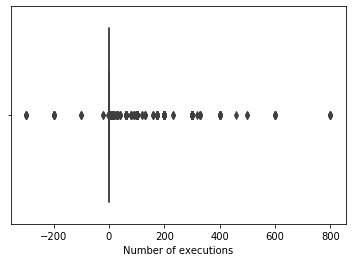

In [1]:
import pandas as pd
DF=pd.read_csv('FINAL.csv')
DF
DF=DF.set_index('Trace_id')
z=list(DF.nunique())
print(z)
DF.drop(columns=['2.1','3.1','6.1','3.2','3.3','6.3','3.4'],axis=1,inplace=True)
DF
for col in ['phi1','phi2','phi3','phi4']:
    DF[col]=DF[col].replace(to_replace="Yes",value=1)
    DF[col]=DF[col].replace(to_replace="No",value=0)
DF
import numpy as np
import seaborn as sns
sns.boxplot(x=DF['Number of executions'])
median1=DF.median()
std1=DF.std() 
DF
DF['0']
DF['7.8'].isnull().sum()
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(DF))
print(z)
threshold = 3
print(np.where(z > 3))

In [2]:
def reduce_mem_usage(df):
    """ 
    iterate through all the columns of a dataframe and 
    modify the data type to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(('Memory usage of dataframe is {:.2f}' 
                     'MB').format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max <\
                  np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max <\
                   np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max <\
                   np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max <\
                   np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max <\
                   np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max <\
                   np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print(('Memory usage after optimization is: {:.2f}' 
                              'MB').format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) 
                                             / start_mem))
    
    return df

reduce_mem_usage(DF)

Memory usage of dataframe is 81.41MB
Memory usage after optimization is: 20.64MB
Decreased by 74.6%


,Number of executions,phi1,phi2,phi3,phi4,0,1,2,3,4,...,6.7,7.7,0.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8
Trace_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0.0,2.0,2.0,1.0,0.0,...,2.0,4.0,3.0,-2.0,0.0,1.0,1.0,-5.0,-1.0,-2.0
0,1,0,0,0,0,0.0,2.0,2.0,1.0,0.0,...,2.0,4.0,10.0,2.0,3.0,0.0,1.0,-4.0,-1.0,3.0
0,1,0,0,0,0,2.0,1.0,0.0,1.0,-1.0,...,2.0,4.0,4.0,0.0,2.0,-1.0,-1.0,-2.0,1.0,-2.0
0,1,0,0,0,0,3.0,-1.0,1.0,-1.0,1.0,...,2.0,4.0,4.0,0.0,2.0,0.0,-2.0,-5.0,0.0,4.0
0,1,0,0,0,0,2.0,1.0,0.0,1.0,-1.0,...,2.0,4.0,3.0,-2.0,0.0,1.0,1.0,-5.0,-1.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1,0,0,0,0,3.0,1.0,3.0,-1.0,2.0,...,1.0,0.0,1.0,-2.0,1.0,0.0,2.0,-1.0,0.0,0.0
1142,1,0,0,0,0,3.0,1.0,3.0,-1.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-2.0,0.0,1.0
1142,1,0,0,0,0,3.0,1.0,3.0,-1.0,2.0,...,1.0,0.0,2.0,1.0,0.0,0.0,-5.0,-2.0,2.0,3.0


In [3]:
Y=DF[['phi1','phi2','phi3','phi4']]
DF
Q1 = DF.quantile(0.25)
Q3 = DF.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(DF < (Q1 - 1.5 * IQR)) or (DF > (Q3 + 1.5 * IQR))
D=DF.copy()
D.drop(columns=['phi1','phi2','phi3','phi4'],axis=1,inplace=True)
D
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Scaled_DF=sc.fit_transform(D)
SDF=pd.DataFrame(data=Scaled_DF,columns=D.columns,index=D.index)
SDF

Number of executions    0.0
phi1                    1.0
phi2                    0.0
phi3                    1.0
phi4                    1.0
                       ... 
3.8                     2.0
4.8                     2.0
5.8                     3.0
6.8                     1.0
7.8                     3.0
Length: 70, dtype: float64
          Number of executions   phi1   phi2   phi3   phi4      0      1  \
Trace_id                                                                   
0                        False  False  False  False  False   True  False   
0                        False  False  False  False  False   True  False   
0                        False  False  False  False  False  False  False   
0                        False  False  False  False  False  False   True   
0                        False  False  False  False  False  False  False   
...                        ...    ...    ...    ...    ...    ...    ...   
1142                     False  False  False  False  Fals

,Number of executions,0,1,2,3,4,5,6,7,0.1,...,6.7,7.7,0.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8
Trace_id,,,,,,,,,,,,,,,,,,,,,
0,-0.049009,-3.218956,1.725847,-0.074646,1.014142,-0.979874,1.183278,-1.440631,0.053904,0.195524,...,1.145774,1.009689,-0.021332,-0.916609,-0.684540,0.009608,0.032793,-0.715223,-1.099527,-1.918018
0,-0.049009,-3.218956,1.725847,-0.074646,1.014142,-0.979874,1.183278,-1.440631,0.053904,0.195524,...,1.145774,1.009689,2.701506,1.338440,1.018202,-0.513382,0.032793,-0.266153,-1.099527,0.790376
0,-0.049009,-0.694567,0.299189,-1.601615,1.014142,-1.795253,1.565742,-1.440631,-1.792053,0.195524,...,1.145774,1.009689,0.367645,0.210915,0.450621,-1.036373,-1.131221,0.631986,1.829044,-1.918018
0,-0.049009,0.567627,-2.554127,-0.838131,-0.594203,-0.164496,0.418351,2.218862,-0.561415,0.195524,...,1.145774,1.009689,0.367645,0.210915,0.450621,-0.513382,-1.713228,-0.715223,0.364759,1.332054
0,-0.049009,-0.694567,0.299189,-1.601615,1.014142,-1.795253,1.565742,-1.440631,-1.792053,0.195524,...,1.145774,1.009689,-0.021332,-0.916609,-0.684540,0.009608,0.032793,-0.715223,-1.099527,-1.918018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,-0.609233,-1.547291,-0.799285,-0.916609,-0.116960,-0.513382,0.614800,1.081056,0.364759,-0.834660
1142,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,-0.609233,-1.547291,-0.799285,0.210915,-0.116960,-0.513382,0.032793,0.631986,0.364759,-0.292982
1142,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,-0.609233,-1.547291,-0.410308,0.774677,-0.684540,-0.513382,-3.459249,0.631986,3.293330,0.790376


In [4]:
SDF['A']=Y['phi1'].values
SDF['A']
SDF['B']=Y['phi2'].values
SDF['C']=Y['phi3'].values
SDF['D']=Y['phi4'].values
#only for centroid based clustering methods(KMEANS)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(SDF))
print(z)
threshold = 3
print(np.where(z > 3))
Q1 = DF.quantile(0.25)
Q3 = DF.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(SDF < (Q1 - 1.5 * IQR)) or (SDF > (Q3 + 1.5 * IQR))
SDF=SDF[(z < 3).all(axis=1)]
SDF

[[0.04900865 3.2189555  1.7258469  ... 0.49445024 0.78206813 1.0524971 ]
 [0.04900865 3.2189555  1.7258469  ... 0.49445024 0.78206813 1.0524971 ]
 [0.04900865 0.6945674  0.29918894 ... 0.49445024 0.78206813 1.0524971 ]
 ...
 [0.04900865 0.5676266  0.29918894 ... 0.49445024 0.78206813 1.0524971 ]
 [0.04900865 0.5676266  0.29918894 ... 0.49445024 0.78206813 1.0524971 ]
 [0.04900865 0.5676266  0.29918894 ... 0.49445024 0.78206813 1.0524971 ]]
(array([     0,      0,      0, ..., 150288, 150288, 150290], dtype=int64), array([ 1, 12, 24, ..., 62, 64, 28], dtype=int64))
Number of executions    0.0
phi1                    1.0
phi2                    0.0
phi3                    1.0
phi4                    1.0
                       ... 
3.8                     2.0
4.8                     2.0
5.8                     3.0
6.8                     1.0
7.8                     3.0
Length: 70, dtype: float64
              0   0.1   0.2    0.3    0.4    0.5    0.6    0.7    0.8      1  \
Trace_id      

,Number of executions,0,1,2,3,4,5,6,7,0.1,...,2.8,3.8,4.8,5.8,6.8,7.8,A,B,C,D
Trace_id,,,,,,,,,,,,,,,,,,,,,
0,-0.049009,-0.694567,0.299189,-1.601615,1.014142,-1.795253,1.565742,-1.440631,-1.792053,0.195524,...,0.450621,-1.036373,-1.131221,0.631986,1.829044,-1.918018,0,0,0,0
0,-0.049009,0.567627,-2.554127,-0.838131,-0.594203,-0.164496,0.418351,2.218862,-0.561415,0.195524,...,0.450621,-0.513382,-1.713228,-0.715223,0.364759,1.332054,0,0,0,0
0,-0.049009,-0.694567,0.299189,-1.601615,1.014142,-1.795253,1.565742,-1.440631,-1.792053,0.195524,...,-0.684540,0.009608,0.032793,-0.715223,-1.099527,-1.918018,0,0,0,0
0,-0.049009,-0.694567,0.299189,-1.601615,1.014142,-1.795253,1.565742,-1.440631,-1.792053,0.195524,...,1.018202,-0.513382,0.032793,-0.266153,-1.099527,0.790376,0,0,0,0
0,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,2.153363,1.578579,-0.549214,0.631986,0.364759,0.248697,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,-0.684540,-1.036373,0.032793,0.182916,1.829044,0.790376,0,0,0,0
1142,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,1.018202,-1.559363,1.778814,1.081056,-1.099527,-0.834660,0,0,0,0
1142,-0.049009,0.567627,0.299189,0.688838,-0.594203,0.650882,-0.729040,0.389115,0.669223,0.195524,...,-0.116960,-0.513382,0.614800,1.081056,0.364759,-0.834660,0,0,0,0


In [5]:
var=SDF.var()
x=SDF.columns
variable=[]
for i in range(0,len(var)):
    if var[i]>=1:
        variable.append(x[i])
for c in ['A','B','C','D']:
    variable.append(c)
len(variable)  
SDF=SDF[variable]
SDF

,2,4,7,5.2,7.2,7.3,0.4,2.5,4.5,4.6,5.6,3.7,4.7,2.8,3.8,5.8,A,B,C,D
Trace_id,,,,,,,,,,,,,,,,,,,,
0,-1.601615,-1.795253,-1.792053,0.444813,0.472528,1.751907,0.537979,-1.633791,0.580297,-0.104639,-0.096050,0.978753,0.017733,0.450621,-1.036373,0.631986,0,0,0,0
0,-0.838131,-0.164496,-0.561415,-0.780806,0.472528,1.751907,-0.284228,-1.633791,0.580297,-0.104639,-0.096050,0.978753,0.017733,0.450621,-0.513382,-0.715223,0,0,0,0
0,-1.601615,-1.795253,-1.792053,0.444813,0.472528,1.751907,-1.106435,-1.633791,0.580297,-0.104639,-0.096050,0.978753,0.017733,-0.684540,0.009608,-0.715223,0,0,0,0
0,-1.601615,-1.795253,-1.792053,0.444813,0.472528,1.751907,-1.106435,-1.633791,0.580297,-0.104639,-0.096050,0.978753,0.017733,1.018202,-0.513382,-0.266153,0,0,0,0
0,0.688838,0.650882,0.669223,-0.780806,-0.652150,-0.570151,0.537979,-1.633791,0.580297,-0.104639,-0.096050,0.978753,0.017733,2.153363,1.578579,0.631986,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,0.688838,0.650882,0.669223,0.444813,0.472528,-0.570151,1.360186,0.551382,0.732288,-1.821579,1.463379,-0.070952,-1.701133,-0.684540,-1.036373,0.182916,0,0,0,0
1142,0.688838,0.650882,0.669223,-0.780806,1.597206,-0.570151,0.537979,0.551382,0.732288,-1.821579,1.463379,-0.070952,-1.701133,1.018202,-1.559363,1.081056,0,0,0,0
1142,0.688838,0.650882,0.669223,-0.780806,1.597206,-0.570151,0.537979,0.551382,0.732288,-1.821579,1.463379,-0.070952,-1.701133,-0.116960,-0.513382,1.081056,0,0,0,0


C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


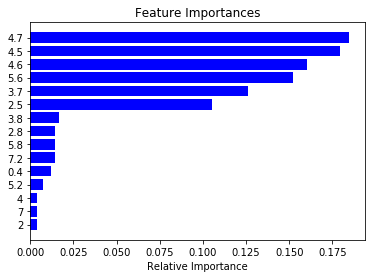

In [6]:
Y=SDF[['A','B','C','D']]
SDF.drop(columns=['A','B','C','D'],axis=1,inplace=True)
Y
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(SDF,Y, test_size = 0.2, random_state = 0)
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=100, max_depth=100)
model.fit(XTrain,YTrain)
features = XTrain.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 16 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#4.7,4.5,4.6,5.6,3.7,2.5

[55.79 74.43 89.55 97.1  98.96 99.99]


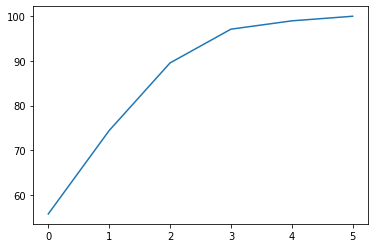

In [12]:
#FOR Model-based clustering
XTrain=XTrain[['4.7','4.5','4.6','5.6','3.7','2.5']]
XTest=XTest[['4.7','4.5','4.6','5.6','3.7','2.5']]
#import dask.dataframe as dd
#import dask.dataframe as dt
#dd=XTrain
#dt=XTest
#dt
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pc1=pca.fit_transform(XTrain)
pc2=pca.transform(XTest)
PC1=pd.DataFrame(data=pc1,columns=['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6'])
PC2=pd.DataFrame(data=pc2,columns=['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6'])
PC1.set_index(XTrain.index,inplace=True)
PC2.set_index(XTest.index,inplace=True)
from matplotlib import pyplot as plt
PC1
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)


In [ ]:
#KernelPCA
XTrain=XTrain[['4.7','4.5','4.6','5.6','3.7','2.5']]
XTest=XTest[['4.7','4.5','4.6','5.6','3.7','2.5']]
from sklearn.decomposition import KernelPCA
pca=KernelPCA(n_components=6,kernel='rbf')
pc1=pca.fit_transform(XTrain)
pc2=pca.transform(XTest)
PC1=pd.DataFrame(data=pc1,columns=['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6'])
PC2=pd.DataFrame(data=pc2,columns=['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6'])
PC1.set_index(XTrain.index,inplace=True)
PC2.set_index(XTest.index,inplace=True)
from matplotlib import pyplot as plt
PC1
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

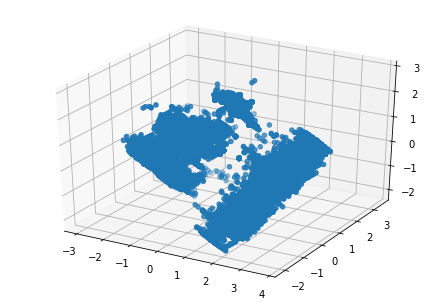

array([[0.04900865, 3.2189555 , 1.7258469 , ..., 0.49445024, 0.78206813,
        1.0524971 ],
       [0.04900865, 3.2189555 , 1.7258469 , ..., 0.49445024, 0.78206813,
        1.0524971 ],
       [0.04900865, 0.6945674 , 0.29918894, ..., 0.49445024, 0.78206813,
        1.0524971 ],
       ...,
       [0.04900865, 0.5676266 , 0.29918894, ..., 0.49445024, 0.78206813,
        1.0524971 ],
       [0.04900865, 0.5676266 , 0.29918894, ..., 0.49445024, 0.78206813,
        1.0524971 ],
       [0.04900865, 0.5676266 , 0.29918894, ..., 0.49445024, 0.78206813,
        1.0524971 ]], dtype=float32)

In [13]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(PC1['Comp1'], PC1['Comp2'],PC1['Comp3'])
pyplot.show()
z

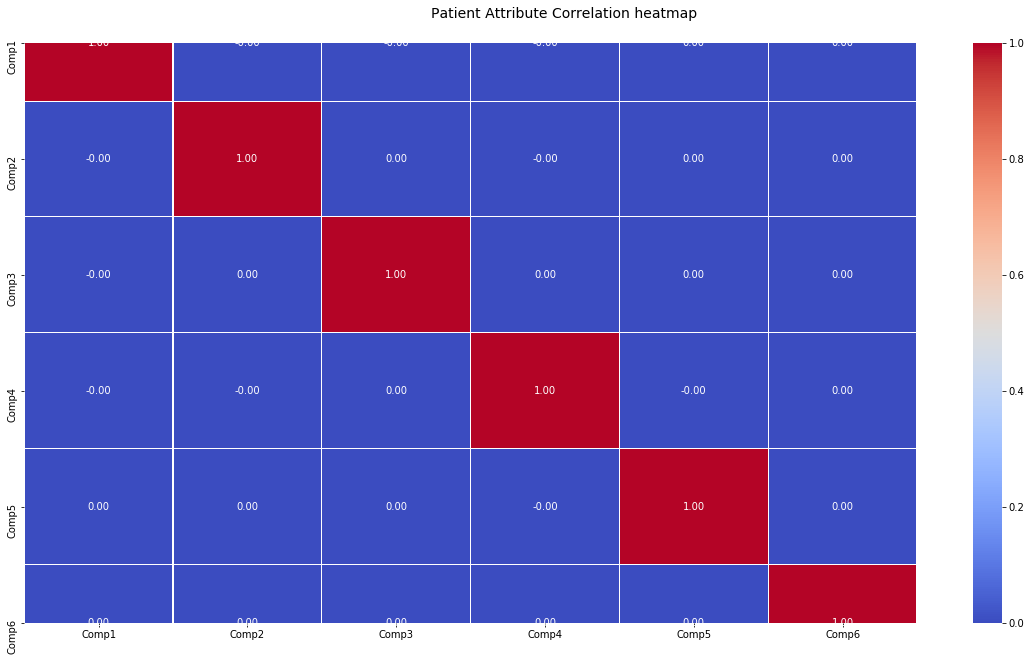

In [14]:
#x_train
import seaborn as sns
import matplotlib.pyplot as plt
#%matlplotlib inline
f, ax = plt.subplots(figsize=(20, 10))
corr =PC1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Patient Attribute Correlation heatmap', fontsize=14)


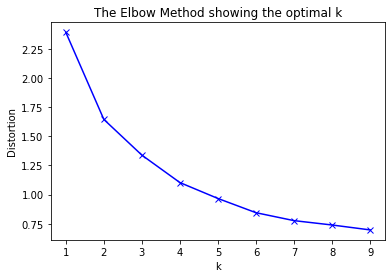

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(PC1)
    kmeanModel.fit(PC1)
    distortions.append(sum(np.min(cdist(PC1, kmeanModel.cluster_centers_ ,'euclidean'), axis=1)) / PC1.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PC1) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PC1)
    silhouette_avg = silhouette_score(PC1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(PC1, cluster_labels)
    

#Optimal number of clusters=8(for Model based clustering)

In [16]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)
model.fit(PC1,YTrain)
model.best_params_
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=3)
nbrs=neigh.fit(PC1)
distances, indices = nbrs.kneighbors(PC1)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances) 

KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import DBSCAN
m = DBSCAN(eps=0.3, min_samples=800)
m.fit(PC1)
clusters = m.labels_
clusters
DD=pd.DataFrame(data=clusters,columns=['cluster'])
DD['cluster'].value_counts()
frame = pd.DataFrame(PC1,columns=PC1.columns)
frame['cluster'] = clusters
frame['cluster'].replace(to_replace=-1,value=7,inplace=True)
frame

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8)
gmm.fit(PC1)
print(gmm.means_)
print('\n')
print(gmm.covariances_)

#predictions from gmm
labels = gmm.predict(PC1)
y_train=list(labels)
y_train
frame = pd.DataFrame(PC1,columns=PC1.columns)
frame['cluster'] = labels
frame


In [ ]:
YTrain['cluster']=frame['cluster'].values
YTrain.sort_values(by='cluster',axis=0,ascending=True,inplace=True)
#YTrain.drop(columns=['cluster'],axis=1,inplace=True)
yt=pd.DataFrame(data=frame['cluster'],columns=['cluster'],index=frame.index)
frame.sort_values(by='cluster',axis=0,ascending=True,inplace=True)
#frame.drop(columns=['cluster'],axis=1,inplace=True)
yt.sort_values(by='cluster',axis=0,ascending=True,inplace=True)
yt

In [ ]:
frame
F_cluster=pd.DataFrame(data=frame['cluster'],columns=['cluster'],index=frame.index)
F_cluster
frame.drop(columns='cluster',axis=1,inplace=True)

In [ ]:
#Decision Tree classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(frame,yt)

#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(frame,yt)

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=frame.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 
PC2

In [ ]:
y_pred = dt.predict(PC2)
y_pred
#y_pred=RF.predict(PC2)
ypred=pd.DataFrame(data=y_pred,columns=['cluster'],index=PC2.index)
PC2['cluster']=ypred['cluster'].values
PC2.sort_values(by='cluster',axis=0,ascending=True,inplace=True)
#PC2.set_index('cluster',inplace=True)
YTest['cluster']=ypred['cluster'].values
YTest.sort_values(by='cluster',axis=0,ascending=True,inplace=True)
#YTest.set_index('cluster',inplace=True)
ypred.sort_values(by='cluster',axis=0,ascending=True,inplace=True)
frame['cluster']=F_cluster['cluster']
frame

In [ ]:
#for training sets(setting cluster as index)
YTrain['cluster']=yt['cluster'].values
YTrain.set_index('cluster',inplace=True)
frame['cluster']=YTrain.index
frame.set_index('cluster',inplace=True)
frame

In [ ]:
#Evaluation metrics using Decision Tree Classification.
ANS=[]
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
for i in range(0,8):
    for value in ['A','B','C','D']:
    dt.fit(frame[frame.index==i],YTrain[YTrain.index==i][value])
    x=dt.predict(PC2[PC2.index==i])
    ANS.append(x)

B=[]
C=[]
E=[]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
for i in range(0,8):
    for value in ['A','B','C','D']:
    dt.fit(frame[frame.index==i],YTrain[YTrain.index==i][value])
    x=dt.predict(PC2[PC2.index==i])
    y=f1_score(YTest[YTest.index==i][value],x,'micro')
    z= accuracy_score(YTest[YTest.index==i][value],x)
    e=1-z
    B.append(y)#F1-score
    C.append(z)#Earliness 
    E.append(e)#Failure rate

In [ ]:
#only for A(first LTL function)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['C1','C2','C3','C4','C5','C6','C7','C8']
F1_Score_means = [B[i] for i in range(len(B)) if i%4==0]
Failure_rate_means = [E[i] for i in range(len(E)) if i%4==0]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,F1_Score_means, width, label='F1_SCORE')
rects2 = ax.bar(x + width/2,Failure_rate_means, width, label='FAILURE_RATE')

ax.set_ylabel('Clusters')
ax.set_title('Scores by f1score and failure_rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()      

In [ ]:
#Evaluation metrics using Random Forest
ANS1=[]
#from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier()
for i in range(0,8):
    for value in ['A','B','C','D']:
    RF.fit(frame[frame.index==i],YTrain[YTrain.index==i][value])
    x=RF.predict(PC2[PC2.index==i])
    ANS1.append(x)

E=[]
F=[]
G=[]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
for i in range(0,8):
    for value in ['A','B','C','D']:
    RF.fit(frame[frame.index==i],YTrain[YTrain.index==i][value])
    x=RF.predict(PC2[PC2.index==i])
    y=f1_score(YTest[YTest.index==i][value],x,'micro')
    z= accuracy_score(YTest[YTest.index==i][value],x)
    e=1-z
    E.append(y)#F1-score
    F.append(z)#Earliness
    G.append(e)#Failure rate
for i in C:
    print(i)    